## Step1) 종목 코드 및 일별 시세 가져오기

In [8]:
import pandas as pd
import requests
#################################
## 함수 정의
#################################
def get_stock_code():
    # 종목코드 다운로드 
    stock_code = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0] 
 
    # 필요없는 column들은 제외
    stock_code = stock_code[['회사명', '종목코드']] 
 
    # 한글 컬럼명을 영어로 변경 
    stock_code = stock_code.rename(columns={'회사명': 'company', '종목코드': 'code'}) 
 
    # 종목코드가 6자리이기 때문에 6자리를 맞춰주기 위해 설정해줌 
    stock_code.code = stock_code.code.map('{:06d}'.format) 
    
    return stock_code
 
def get_stock(code):
    df = pd.DataFrame()
    for page in range(1,21):
        # 일별 시세 url  
        url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)     
        url = '{url}&page={page}'.format(url=url, page=page)    
        header = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.77 Safari/537.36'}  
        res = requests.get(url,headers=header)
        current_df = pd.read_html(res.text, header=0)[0]
        df = df.append(current_df, ignore_index=True)
        
    return df
 
def clean_data(df):
    # df.dropna()를 이용해 결측값 있는 행 제거 
    df = df.dropna() 
 
    # 한글로 된 컬럼명을 영어로 바꿔줌 
    df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff', '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'}) 
    # 데이터의 타입을 int형으로 바꿔줌 
    df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int) 
 
    # 컬럼명 'date'의 타입을 date로 바꿔줌 
    df['date'] = pd.to_datetime(df['date']) 
 
    # 일자(date)를 기준으로 오름차순 정렬 
    df = df.sort_values(by=['date'], ascending=False) 
    
    return df
 
#################################
## 함수 호출
#################################
# 종목 코드 가져오기
company='삼성전자' 
stock_code = get_stock_code()
 
# 일별 시세 가져오기
code = stock_code[stock_code.company==company].code.values[0].strip() ## strip() : 공백제거
df = get_stock(code)
 
# 일별 시세 클린징
df = clean_data(df)
print(df)

          date  close  diff   open   high    low    volume
1   2021-06-01  80600   100  80500  81300  80100  13980614
2   2021-05-31  80500   400  80300  80600  79600  13321324
3   2021-05-28  80100   500  79800  80400  79400  12360199
4   2021-05-27  79600   200  80000  80000  79100  23198510
5   2021-05-26  79800   100  80400  80500  79700  11984359
..         ...    ...   ...    ...    ...    ...       ...
294 2020-08-13  58700   300  59400  59600  58000  22089460
295 2020-08-12  59000   800  58200  59000  57700  18573934
296 2020-08-11  58200   400  58000  59500  57800  24907912
297 2020-08-10  57800   300  57600  58300  57500  17774291
298 2020-08-07  57500   500  57900  58400  57100  18751717

[200 rows x 7 columns]


## Step2) 보고 자료 준비하기

FileNotFoundError: [Errno 2] No such file or directory: 'stock_report\\삼성전자_chart.png'

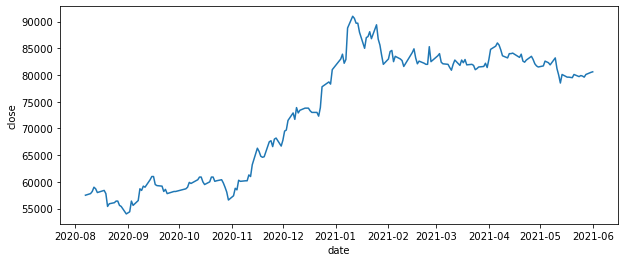

In [10]:
import matplotlib.pyplot as plt
from pandas.plotting import table
import os

# %matplotlib inline은 jupyter notebook 사용자 용 - jupyter notebook 내에 그래프가 그려지게 한다.
%matplotlib inline
#################################
## 차트 그리기
#################################
plt.figure(figsize=(10,4))
plt.plot(df['date'], df['close'])
plt.xlabel('date')
plt.ylabel('close')

#################################
## 차트 저장 및 출력하기
#################################
chart_fname = os.path.join("stock_report" ,'{company}_chart.png'.format(company=company))
plt.savefig(chart_fname)
plt.show()

#################################
## 일별 시세 그리기
#################################
plt.figure(figsize=(15,4))
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False) # hide the x axis
ax.yaxis.set_visible(False) # hide the y axis
df = df.sort_values(by=['date'], ascending=False)
table(ax, df.head(10), loc='center', cellLoc = 'center', rowLoc = 'center')# where df is your data frame

#################################
## 일별 시세 저장하기
#################################
table_fname = os.path.join("stock_report" ,'{company}_table.png'.format(company=company))
plt.savefig(table_fname)